# Predicting the likelihood of e-signing a loan based on financial history

**Market:** The target audience is  the set of loan applicants who reached out through an intermediary marketplace

**Product:** A loan

**Goal:** Develop a model to predict 'quality' applicants. In this case study, 'quality' applicants are those who reach a key part of the loan application process.

**Business Challenge:**
- In this case study we will be working for a fintech company that specializes in loans. It offers low APR loans to applicants based on their financial habits. This company has partnered with a P2P lending marketplace that provides real-time leads (loan applicants). 
- The company tasks with creating a model that predicts whether or not these leads will complete the e-signing phase of the loan application. The company seeks to leverage this model to identify less 'quality' applicants (e.g. those who are not responding to the onboarding process). and experiment with giving them different onboarding screens.





## Data

- Because applicants have arrived through the marketplace, we have access to their financial data before the onboarding process begins. This data includes personal information like age, and time employed, as well as other financial metrics. These financial data points are used to create risk scores based on many different risk factors.
- In this case study we are also given the set of scores from algorithms built by finance and engineering teams. Also, the marketplace itself provides us with its own lead quality scores.




### Importing Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('P39-Financial-Data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


##### So we applied to describe a method to the data set and is going to give us a description of all the numerical columns.
- so we see that the minimum age is 18 years old, which is what we expect, and we see that the maximum age and 96 years old. So there's somebody who's pretty old now. The medium, which is the 50 percentile, is on around 42 years old. Looks pretty evenly distributed.
- Next field, the homeowner seems to be pretty good. The medium still zero, but 75% is one. So this tells us that it's somewhat evenly split because the mean is 42% or so.
-  For income, the lowest monthly income is 905. The highest one we have is almost ten thousand dollars per month.
- For months employ obviously the smallest one to be zero, and the one's going to be month eleven.
- The same four years employed, years employed is going to be the minimum zero years employed, meaning that you have less in the year employed and the maximum up to 16.
- In the has_debt column we see that the average is 79%, meaning that 79% of these people have some debt.
- Amount requested is on the lower end is 350, and 10200 is the highest.
- For inquires last month, we have up to a person who has had 30 inquiries in the last month, which is pretty crazy, actually, but the median and the seventy-five percentile range from 6 to 8.
- e-signed is our response variable and we have an average of 53 percent, so we can conclude that almost half of them are a and almost half of them are not e-signed. So it's pretty balanced when it comes to the response variable.




## Data cleaning

In [6]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

##### No particuler field has any missing value

## Data visualization

#### Histograms

In [7]:
dataset2 = dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

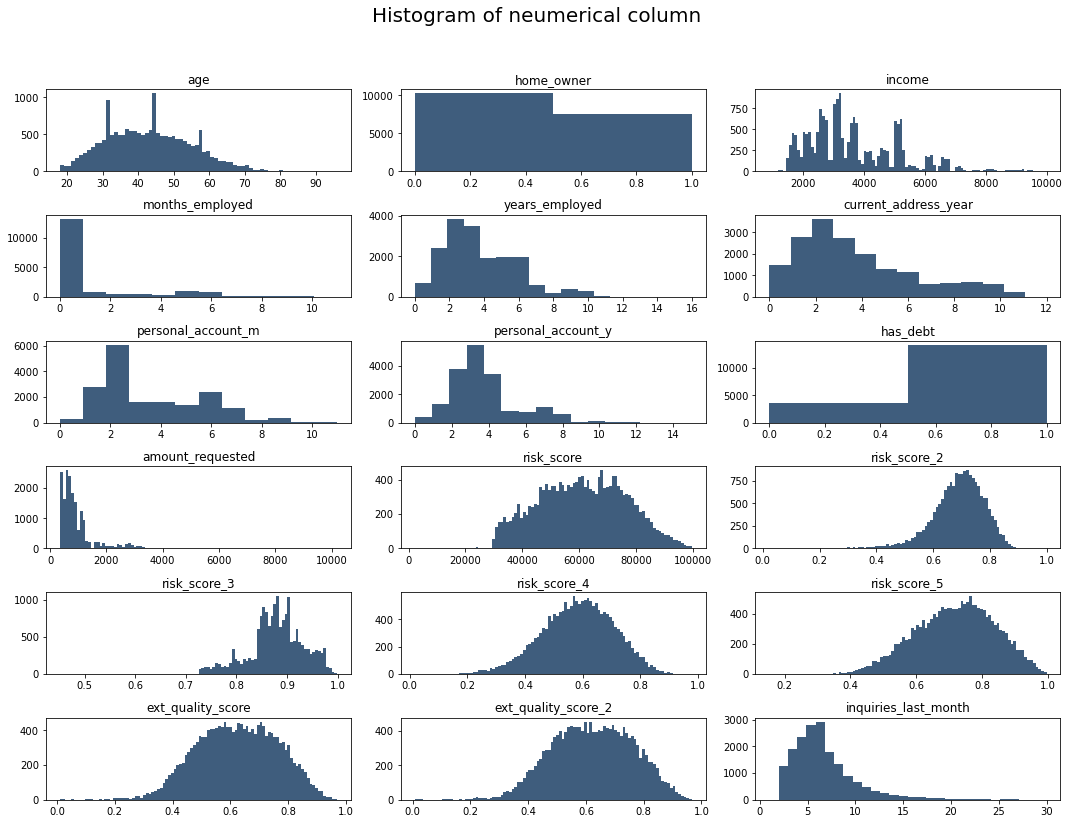

In [8]:
fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of neumerical column", fontsize=20)

for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals>=100:
        vals=100
        
    plt.hist(dataset2.iloc[:,i], bins=vals, color='#3F5D7D')
    
plt.tight_layout(rect=[0,0.03,1,0.95])

- We have an age histogram, which is for the most part, evenly distributed.
- In the homeowner histogram, since this is a binary variable, we only have two bars, zero or one, and they are somewhat evenly distributed.
- The income, well, the income, even though there are ups and downs, if we draw a line on top of these types of areas of the bars right here, we're going to see in kind of normal distribution that is right-skewed.
- So next we see months employed. We see that most of the users are on one particular value and very few like everywhere else. And this is very weird because this shouldn't be the case that so many people have even years of employment. Meaning that because employment is distributed by years and months and years could be 2, 3, and 4 and months could be again 1 to 11. So it is weird to see that a lot of users have one year exactly and they're months like exactly zero. So they have two years flat, three years flat, four years. This doesn't seem right. Because of this, we can assume that the data set here in months employed is not quite accurate.
- years_employed seems to be very normally distributed with the right skewed as well.
- The same applies to current_address_year, personal_account_m, and personal_account_y.
- Now, for has_debt, which is most of the people have that as compared to those who do not.
- From the amount_requested histogram see that most of the people request from like 500 or 300 all the way to one thousand to -fifteen hundred for the most part. And then we have a small table of people who request a lot more.
- Now, if we look at the risk scores this course is built professionally and here we see the distribution is pretty normal, looking. the same for risk or two, three, four, five.
- And even the external quality scores are normally distributed for the most part.
- For the last one inquires_last_month, the inquiries are spiked up at the beginning, and then they have a right tail like most of the parts that we have seen, which makes sense.




#### Correlation plot

<AxesSubplot:title={'center':'Correlation with e_signed'}>

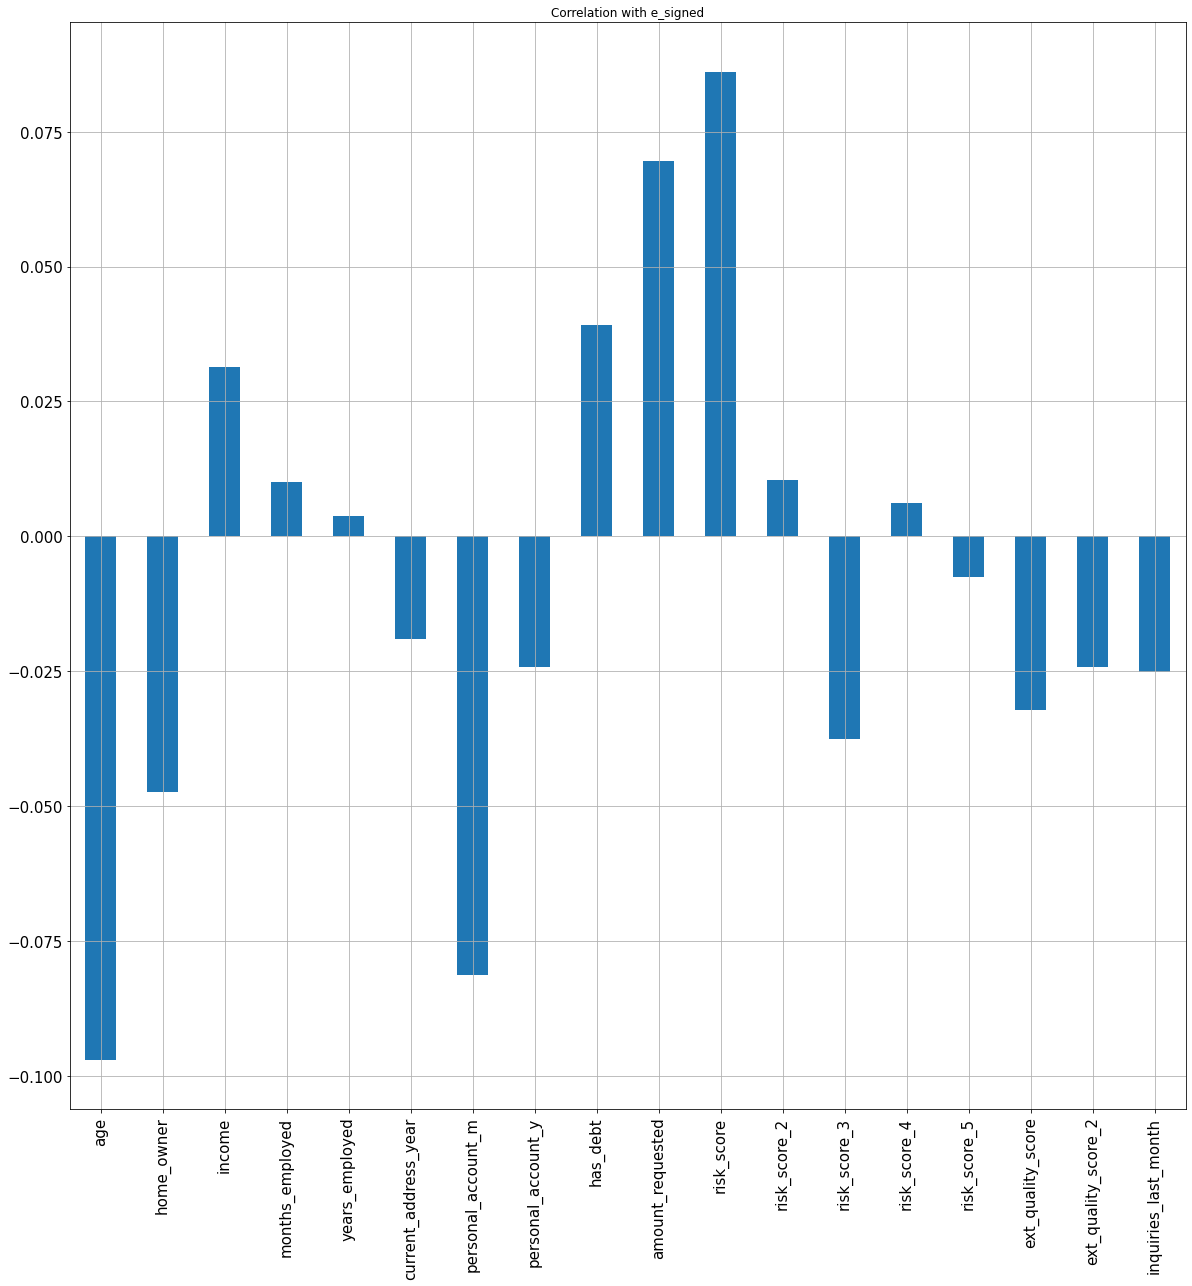

In [9]:
dataset2.corrwith(dataset.e_signed).plot.bar(
                    figsize=(20,20), title="Correlation with e_signed", fontsize=15, grid=True)

This plot gives us a linear correlation between the arguments and the response variable, e-signed.
- Age seems to be very powerfully correlated with the response variable being negative, meaning that as you grow older, you are less likely to put up with the entire onboarding process and get to the final stage, the final screen.
- Homeowner is negatively correlated with e-signing, meaning that if you're a homeowner, you're less likely to reach the final step of the process.
- It's good to see income is positively correlated.
- The next correlation is a personal account, which is negatively correlated.
- Now, the other big ones are these three charts has_debt, amount_requested, and risk_score number. Meaning that if a person has a debt, then they're more likely to be on board.
- For an amount_requested the most amount that you request, the more likely you are to put up with everything, and reach the final step of the process.
- We see the risk score, so after the initial risk score increases their relationship with the response variable increases. Now, this could be because we have not normalized that relationship yet.
- And finally, inquires, which is how many inquiries the person has had. And the more inquiries you have, the less likely you are to reach the same process.




In [10]:
sns.set_style('white')

In [11]:
corr = dataset2.corr()

In [12]:
#generate mask for upper triangle
mask=np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

<AxesSubplot:>

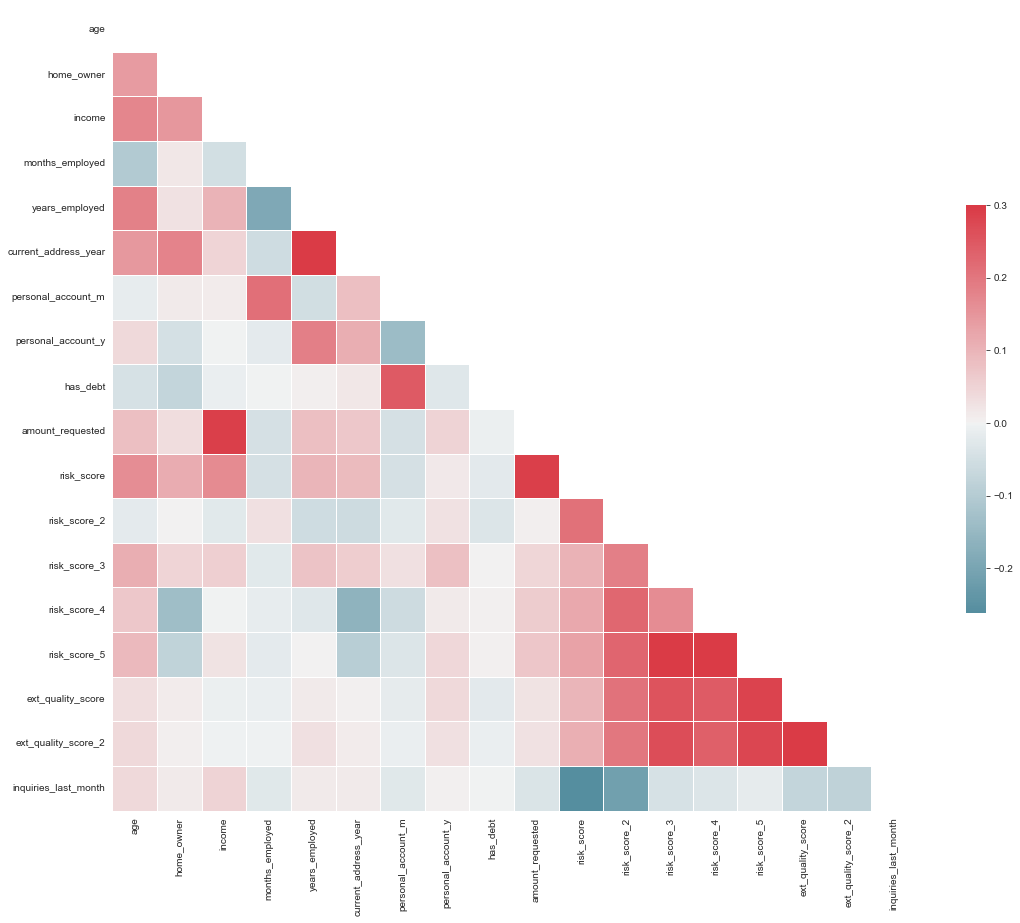

In [13]:
f,ax=plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Engineering

In [14]:
import random
import time

In [15]:
random.seed(100)

In [16]:
# We're getting rid of  months_employeed col as its not an actual representation of the data
dataset= dataset.drop(columns=['months_employed'])

In [17]:
# we are going to combine personal account year and months col in to one single months column
dataset['personal_account_months'] = (dataset.personal_account_m+(dataset.personal_account_y*12))

In [18]:
dataset[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [19]:
dataset= dataset.drop(columns=['personal_account_m','personal_account_y'])

### onehot encoding

There is only one categorical column and its pay_schedule

In [20]:
dataset = pd.get_dummies(dataset)

In [21]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

pay_schedule column split into four different columns, 'pay_schedule_bi-weekly', 'pay_schedule_monthly', 'pay_schedule_semi-monthly', 'pay_schedule_weekly'. We need to remove one of the columns from the dataset to avoid a dummy variable term. So by removing one of them, we make them linearly independent again. So dropping the semi_monthly pay schedule.



In [22]:
dataset = dataset.drop(columns=['pay_schedule_semi-monthly'])

In [23]:
response = dataset['e_signed']

In [24]:
users = dataset['entry_id']

In [25]:
dataset = dataset.drop(columns=['e_signed','entry_id'])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

### feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [29]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

## Model building

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [33]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [34]:
results = pd.DataFrame([['Logistic Regression (Lasso)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','f1 score'])
results

,Model,Accuracy,Precision,Recall,f1 score
0,Logistic Regression (Lasso),0.563372,0.577844,0.700726,0.63338


- The accuracy is 56%, it's not high at all. 
- The precision again in 57.7% is good. It's like there's something there, but it is not too high.
- Recall is 70%, which means that out of all the actual positives, we have predicted them to be true around 70 percent of the time, which is good.
- But for precision, we have felt short and we can see the F1 score is some in-between number here, around 63.

Now, this is how we're going to build our models going forward.




### SVM (Linear)

In [35]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_result = pd.DataFrame([['SVC (Linear)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','f1 score'])
results = results.append(model_result, ignore_index=True)

print(results)

                         Model  Accuracy  Precision    Recall  f1 score
0  Logistic Regression (Lasso)  0.563372   0.577844  0.700726  0.633380
1                 SVC (Linear)  0.568118   0.578427  0.728734  0.644939


C:\Users\chitr\AppData\Local\Temp\ipykernel_27212\3644048179.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


- The accuracy and precision are almost identical to the previous model.

- The recall is high It's even higher than the one from the last model. So obviously there's still bias in this support vector machine model.

- And the F1 score is 64.4, a little bit higher, but not that much better.




### SVM (rbf)

In [36]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_result = pd.DataFrame([['SVC (rbf)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','f1 score'])
results = results.append(model_result, ignore_index=True)

print(results)

                         Model  Accuracy  Precision    Recall  f1 score
0  Logistic Regression (Lasso)  0.563372   0.577844  0.700726  0.633380
1                 SVC (Linear)  0.568118   0.578427  0.728734  0.644939
2                    SVC (rbf)  0.592686   0.607519  0.687241  0.644926


C:\Users\chitr\AppData\Local\Temp\ipykernel_27212\3569553703.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


- So rbf actually gives us a better accuracy by almost three more points.

- The precision increases as well and the recall goes down a little bit.

- Now, although the recall has gone down, so the precision has gone up. So the overall F1 score, which is the balance of these two, it's still similar to previous models, which is 64.5%.

So this is slightly better, is less unbalanced, and has higher accuracy.




### Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_estimators =100, criterion='entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_result = pd.DataFrame([['Random forest (n=100)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','f1 score'])
results = results.append(model_result, ignore_index=True)

print(results)

                         Model  Accuracy  Precision    Recall  f1 score
0  Logistic Regression (Lasso)  0.563372   0.577844  0.700726  0.633380
1                 SVC (Linear)  0.568118   0.578427  0.728734  0.644939
2                    SVC (rbf)  0.592686   0.607519  0.687241  0.644926
3        Random forest (n=100)  0.623953   0.643741  0.674793  0.658901


C:\Users\chitr\AppData\Local\Temp\ipykernel_27212\1340891480.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


- So the random forest with 100 trees has given us approximately 62%, which is almost 3% higher than the SVM, which was the highest accuracy we had.

- The precision has gone up and the recall didn't change much. But the actual F1 score has gone up, meaning that it is more balance.

- It is a better-performing model. So we will be using this model.


So now that we have decided which model to use, the last step is to actually validate this model, to see if it performs like it says it does.




## K-fold cross validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Random forest classifier accuracy: %0.2f (+/- %0.2f)" %(accuracies.mean(), accuracies.std()*2))

Random forest classifier accuracy: 0.63 (+/- 0.03)


We got an accuracy for k-fold cross-validation of 63%, which extends around three points, meaning that it could be from 60 to 66. This is even higher than the run we did in the results dataset.

So if we took our cross-validation, we're guaranteeing that this model is consistent throughout all of the data that exists in the training set. This is good and we can finally guarantee that Random forest is the best option.




## Grid Search

We will perform parameter tuning with the help of a grid search to find the best parameters for the random forest that gives us the most accuracy in our model




### Round 1 : Entropy

In [39]:
parameters = {"max_depth":[3,None],
             "max_features":[1,5,10],
             'min_samples_split':[2,5,20],
             "min_samples_leaf":[1,5,10],
             "bootstrap":[True, False],
             "criterion":["entropy"]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring="accuracy",
                          cv=10,
                          n_jobs=-1)

In [40]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print("took %0.2f seconds" % (t1-t0))

took 1047.05 seconds


In [41]:
rf_best_accuracy = grid_search.best_score_
rf_best_accuracy

0.6377942902143021

In [42]:
rf_best_parameters = grid_search.best_params_
rf_best_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

So with the new parameters, we are getting up to 63.7, almost 64% accuracy which is not much of an improvement but it's pretty good. Also, we have found the best parameters as well and we are going to use them for the second round of grid search to this data set and see if can find slightly better accuracy



### Round 2 : Entropy

In [43]:
parameters = {"max_depth":[None],
             "max_features":[3,5,7],
             'min_samples_split':[18,20,22],
             "min_samples_leaf":[2,5,8],
             "bootstrap":[False],
             "criterion":["entropy"]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring="accuracy",
                          cv=10,
                          n_jobs=-1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print("took %0.2f seconds" % (t1-t0))

took 517.58 seconds


In [44]:
rf_best_accuracy = grid_search.best_score_
rf_best_accuracy

0.6377942902143021

In [45]:
rf_best_parameters = grid_search.best_params_
rf_best_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

We got the exact same results that we got in first round. So we will stick with that and run our test on test dataset.

In [46]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_result = pd.DataFrame([['Random forest (n=100, GSx2 + entropy)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','f1 score'])
results = results.append(model_result, ignore_index=True)

print(results)

                                   Model  Accuracy  Precision    Recall  \
0            Logistic Regression (Lasso)  0.563372   0.577844  0.700726   
1                           SVC (Linear)  0.568118   0.578427  0.728734   
2                              SVC (rbf)  0.592686   0.607519  0.687241   
3                  Random forest (n=100)  0.623953   0.643741  0.674793   
4  Random forest (n=100, GSx2 + entropy)  0.629257   0.647783  0.682054   

   f1 score  
0  0.633380  
1  0.644939  
2  0.644926  
3  0.658901  
4  0.664477  


C:\Users\chitr\AppData\Local\Temp\ipykernel_27212\955465518.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


Now our model is giving us slightly higher accuracy, almost the same precision, slightly high recall, and F1 score.

So this grid search model is actually performing slightly better than the original random forest model.




### Round1: Grid search with Gini

In [47]:
parameters = {"max_depth":[3,None],
             "max_features":[1,5,10],
             'min_samples_split':[2,5,20],
             "min_samples_leaf":[1,5,10],
             "bootstrap":[True, False],
             "criterion":["gini"]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring="accuracy",
                          cv=10,
                          n_jobs=-1)

In [48]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print("took %0.2f seconds" % (t1-t0))

took 655.45 seconds


In [49]:
rf_best_accuracy = grid_search.best_score_
rf_best_accuracy

0.6353512282315882

In [50]:
rf_best_parameters = grid_search.best_params_
rf_best_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

We have an accuracy of 63.5% which is almost the same as before. So we will try and use the best parameters for round 2

### Round2: Grid search with Gini

In [51]:
parameters = {"max_depth":[None],
             "max_features":[8,10,12],
             'min_samples_split':[1,2,3],
             "min_samples_leaf":[3,5,7],
             "bootstrap":[True],
             "criterion":["gini"]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring="accuracy",
                          cv=10,
                          n_jobs=-1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print("took %0.2f seconds" % (t1-t0))

C:\Users\chitr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chitr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chitr\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\chitr\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\chitr\anaconda3\lib\site-packages\j

took 232.19 seconds


In [52]:
rf_best_accuracy = grid_search.best_score_
rf_best_accuracy

0.6369569348984628

In [53]:
rf_best_parameters = grid_search.best_params_
rf_best_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

In [54]:
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_result = pd.DataFrame([['Random forest (n=100, GSx2 + gini)',acc,prec, rec, f1]],
            columns=['Model','Accuracy','Precision','Recall','f1 score'])
results = results.append(model_result, ignore_index=True)

print(results)

                                   Model  Accuracy  Precision    Recall  \
0            Logistic Regression (Lasso)  0.563372   0.577844  0.700726   
1                           SVC (Linear)  0.568118   0.578427  0.728734   
2                              SVC (rbf)  0.592686   0.607519  0.687241   
3                  Random forest (n=100)  0.623953   0.643741  0.674793   
4  Random forest (n=100, GSx2 + entropy)  0.629257   0.647783  0.682054   
5     Random forest (n=100, GSx2 + gini)  0.628141   0.643684  0.692427   

   f1 score  
0  0.633380  
1  0.644939  
2  0.644926  
3  0.658901  
4  0.664477  
5  0.667166  


C:\Users\chitr\AppData\Local\Temp\ipykernel_27212\167004772.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_result, ignore_index=True)


From the above results, we can see that random forests with entropy and Gini are not that different. So we will stick to the random forest with entropy as that's the best model that we can possibly use.



## final results

In [55]:
final_results = pd.concat([y_test, users],axis=1).dropna()
final_results['predictions']=y_pred
final_results=final_results[['entry_id','e_signed','predictions']]

In [56]:
final_results

,entry_id,e_signed,predictions
3629,8825262,1.0,0
1820,9216889,1.0,0
6685,1762129,0.0,0
17241,7249770,1.0,1
8332,5967375,1.0,1
...,...,...,...
7546,9384491,1.0,1
9836,2445124,1.0,0
7446,6534419,1.0,1
9526,5501730,1.0,0


# Conclusion

Our Model has given us an accuracy of around 63%. with this, we have an algorithm that can help predict whether or not a user will complete the E-signing step of the loan application. 

One way to leverage this model is to target those predicted to not reach the e-signing phase with customized onboarding. This means that when a lead arrives from the marketplace, they may receive a different onboarding experience based on how likely they are to finish the general onboarding process. This can help our company minimize how many people drop from the funnel.

This funnel of screens is as effective as we, as a company, build it. Therefore, user drop-off in this funnel falls entirely on our shoulders. So, with new onboarding screens built intentionally to lead users to finalize the loan application, we can attempt to get more than 40% of those predicted to not finish the process to complete the e-sign step.

If we can do this, then we can drastically increase profits. Many lending companies provide hundreds of loans every day, gaining money for each one. As a result, if we can increase the number of loan takers, we are increasing profits.
